# Analyse Exploratoire de données
---
 1. Importation des packages
 2. Chargements de données avec pandas
 3. Statistiques descriptives des données
 4. Visualisation des données
 5. Résultats obtenus

 ---

 ## 1. Importation des packages

In [10]:
import pandas as pd
import seaborn as sns

---

##  2 - Chargements de données avec pandas


In [5]:
path ='/content/sample_sales_data.csv'
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## 3. Statistiques descriptives des données

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


Nous avons un dataframe de 7829 lignes et 8 colonnes.

- transaction_id = il s'agit d'un identifiant unique attribué à chaque transaction
- timestamp = il s'agit de la date à laquelle la transaction a été effectuée
- product_id = il s'agit d'un identifiant attribué au produit vendu. Chaque produit a un identifiant unique
- category = il s'agit de la catégorie dans laquelle le produit est contenu
- customer_type = il s'agit du type de client qui a effectué la transaction
- unit_price = le prix de vente d'une unité de ce produit
- quantity = le nombre d'unités vendues pour ce produit dans le cadre de cette transaction
- total = le montant total à payer par le client
- payment_type = le mode de paiement utilisé par le client


In [7]:
# Calculer les statistiques descriptives des variables numériques
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


## 4. Visualisation des données

In [8]:
# Visualiser la distribution des variables numériques
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

# Afficher les valeurs uniques
def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

# Visualiser la distribution des variables catégorielles
def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

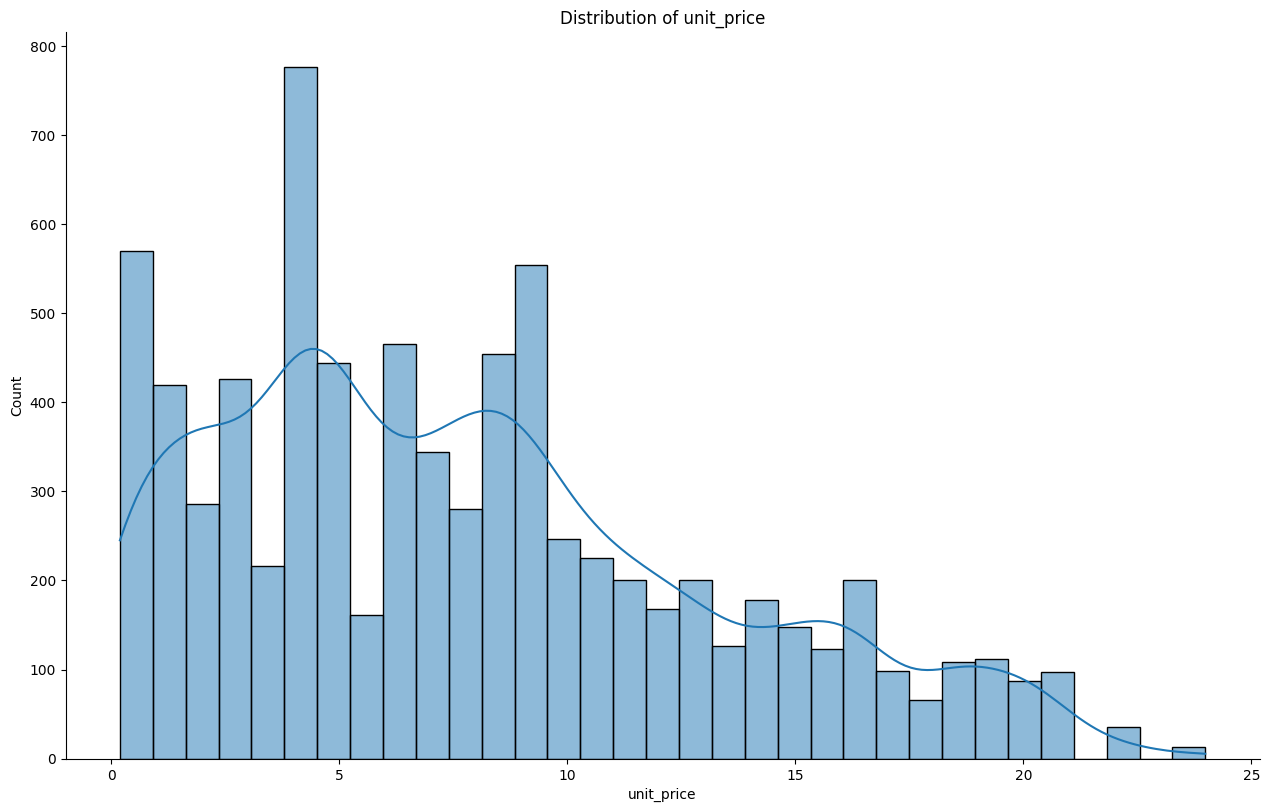

In [11]:
plot_continuous_distribution(df, 'unit_price')

Cela nous indique que la distribution du `unit_price` est positivement asymétrique, c'est-à-dire qu'il y a plus de ventes de produits à bas prix unitaires par rapport aux produits à prix unitaires élevé.


Cela a du sens, on s'attendrait à ce qu'une épicerie vende davantage de produits bon marché et seulement quelques produits vraiment coûteux.

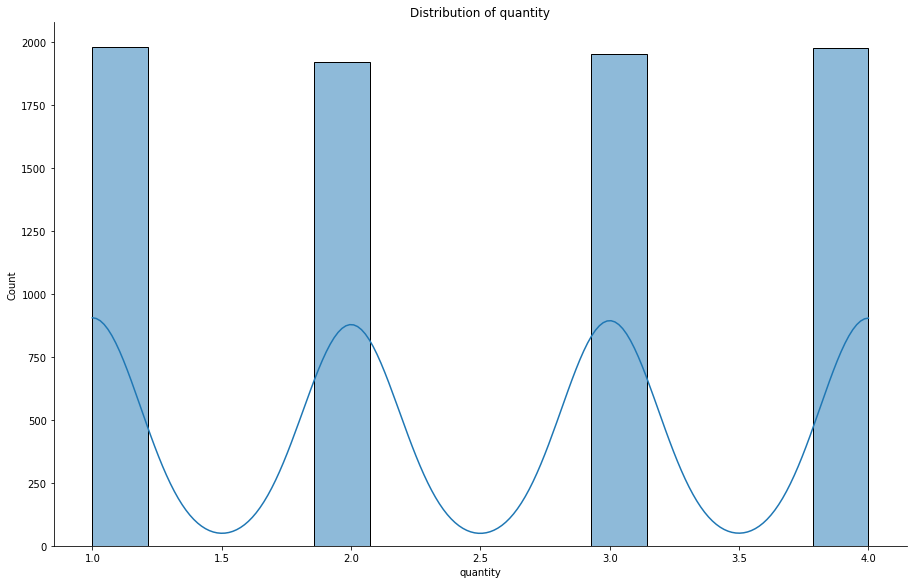

In [ ]:
plot_continuous_distribution(df, 'quantity')

La distribution de la variable `quantity` est très différente. Nous pouvons voir qu'il n'existe que 4 valeurs uniques (1, 2, 3 et 4) et qu'elles sont assez uniformément réparties. Il semble que les clients achètent des quantités égales, allant de 1 à 4 unités.

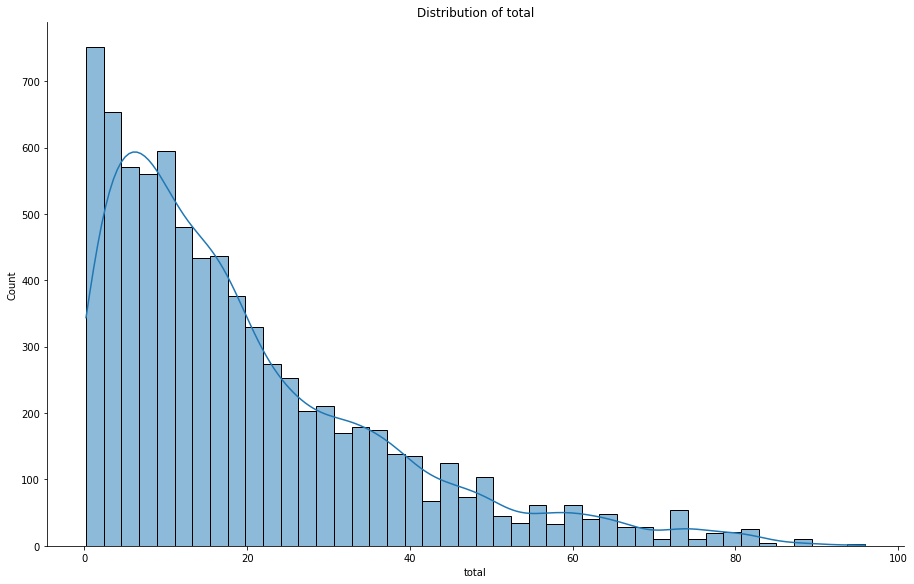

In [ ]:
plot_continuous_distribution(df, 'total')

La variable `total` suit une distribution similaire à celle de `unit_price`.  le total est calculé comme étant `unit_price x quantity`.

On s'attendrait à ce que les clients dans une épicerie réalisent généralement davantage de transactions de faible valeur et ne fassent occasionnellement qu'une transaction de très grande valeur.

Maintenant, tournons notre attention vers les colonnes catégorielles du jeu de données.

Avant de visualiser ces colonnes, il est utile de comprendre combien de valeurs uniques ces colonnes contiennent. Si une colonne catégorielle a des milliers de valeurs uniques, il sera très difficile de la visualiser.

In [ ]:
get_unique_values(df, 'transaction_id')

Column: transaction_id has 7829 unique values

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64


Comme expliqué précédemment, `transaction_id` est une colonne d'identifiant unique pour chaque transaction. Étant donné que chaque ligne représente une transaction unique, cela signifie que nous avons 7829 identifiants de transaction uniques. Par conséquent, cette colonne n'est pas utile à visualiser.

In [ ]:
get_unique_values(df, 'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


De manière similaire, `product_id` est une colonne d'identifiant, mais elle est unique en fonction du produit vendu dans la transaction.

De ce calcul, nous pouvons voir que nous avons 300 identifiants de produit uniques, d'où 300 produits uniques dans l'ensemble de données. Ce n'est pas utile à visualiser, mais c'est certainement intéressant à savoir.


D'après la sortie de la fonction d'aide, nous pouvons voir que le produit le plus fréquemment vendu dans cet ensemble de données était `ecac012c-1dec-41d4-9ebd-56fb7166f6d9`, vendu 114 fois pendant la semaine. Alors que le produit le moins vendu était `ec0bb9b5-45e3-4de8-963d-e92aa91a201e`, vendu seulement 3 fois.


In [ ]:
get_unique_values(df, 'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


Il y a 22 valeurs uniques pour `category`, avec `fruit` et `vegetables` étant les 2 catégories de produits les plus fréquemment achetées et `spices and herbs` étant la moins achetée. Visualisons cela également.

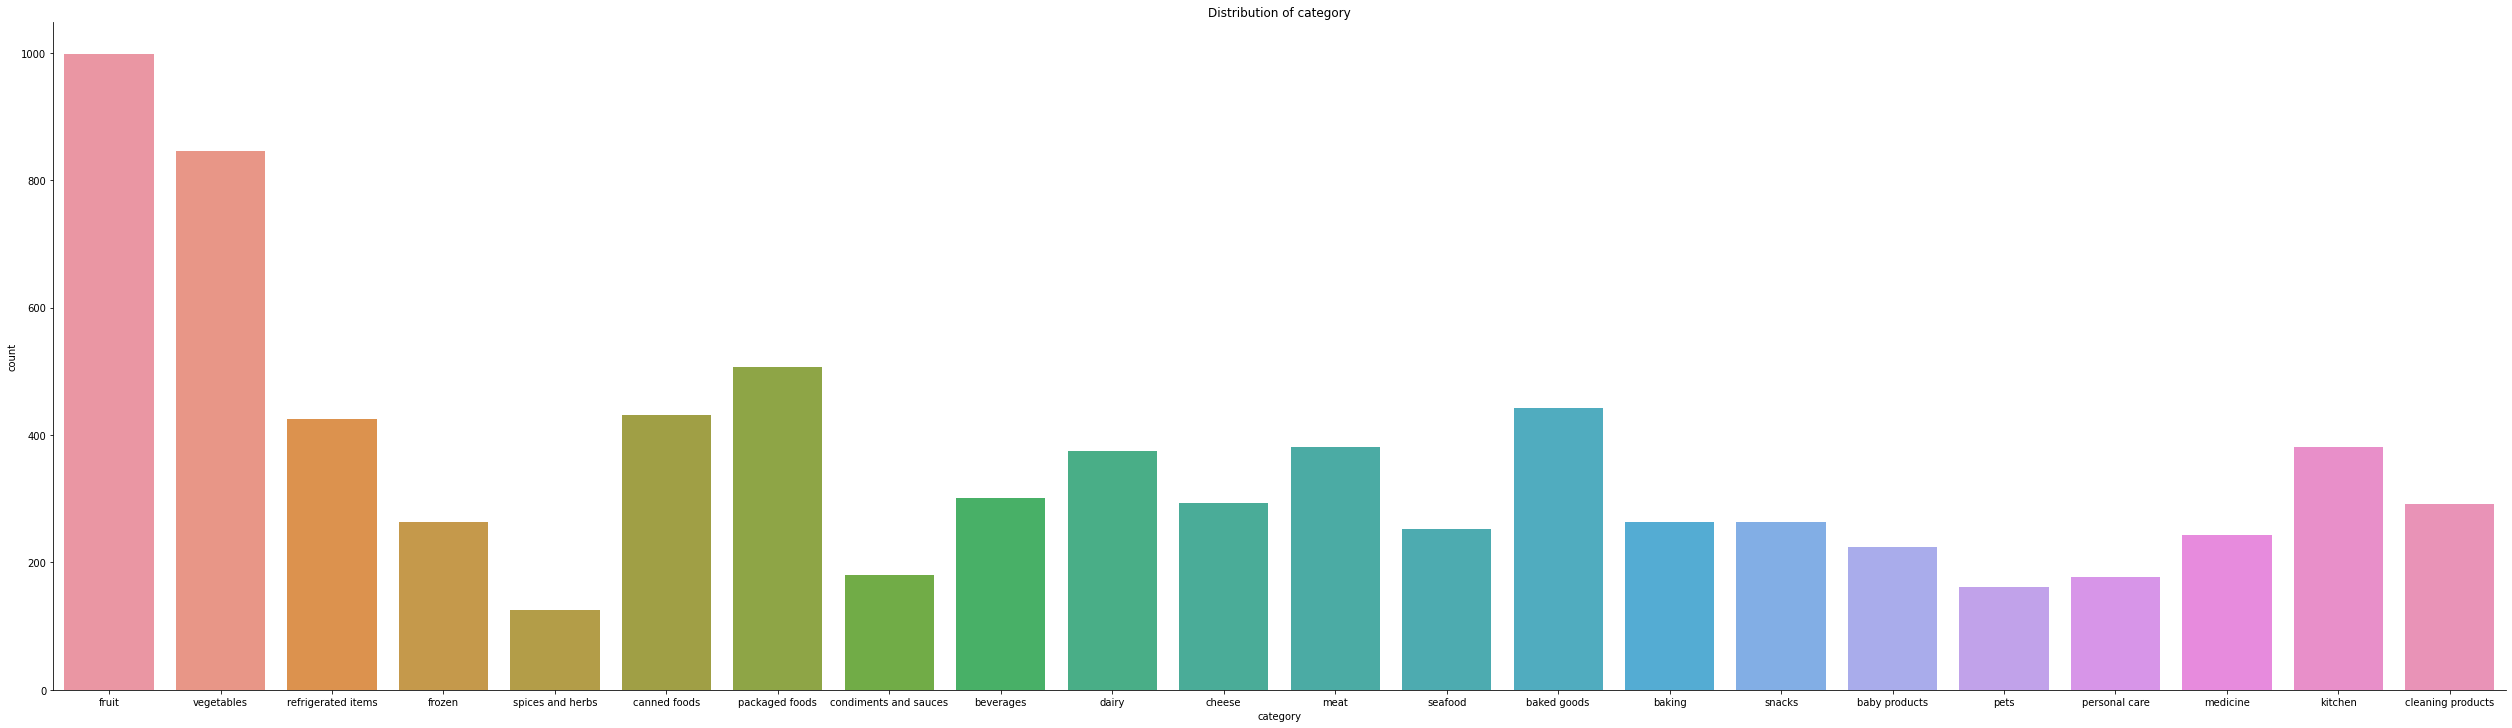

In [ ]:
plot_categorical_distribution(df, 'category', height=10, aspect=3.5)

In [ ]:
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


Il y a 5 valeurs uniques pour `customer_type`, et elles semblent être réparties de manière équilibrée. Visualisons cela :

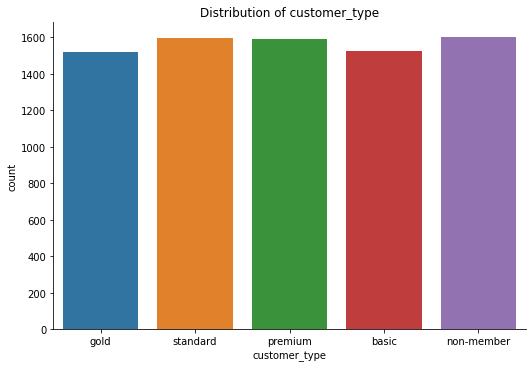

In [ ]:
plot_categorical_distribution(df, 'customer_type', height=5, aspect=1.5)

Sur cet échantillon de données, les non-membres semblent être le type de clients le plus fréquent, suivis de près par les clients standard et premium.

In [ ]:
get_unique_values(df, 'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


Il y a 4 valeurs uniques pour `payment_type`, et elles semblent être assez uniformément réparties une fois de plus. Visualisons cela :

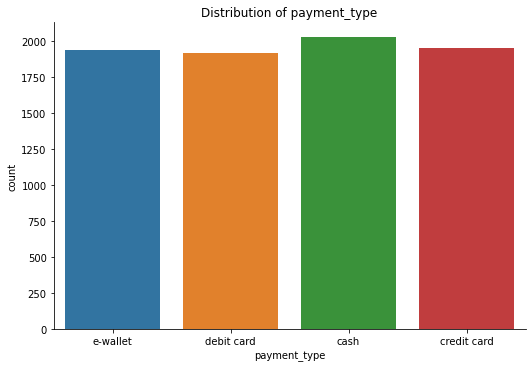

In [ ]:
plot_categorical_distribution(df, 'payment_type', height=5, aspect=1.5)

L'argent liquide semble être la méthode de paiement la plus fréquemment utilisée dans cet échantillon de données, tandis que les cartes de débit sont les moins fréquentes.

Cet ensemble de données est un échantillon provenant d'un seul magasin sur une semaine. Il sera donc intéressant de voir si l'échantillon de la population suit des tendances similaires.

In [ ]:
get_unique_values(df, 'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


De toute évidence, il y a beaucoup de valeurs uniques pour la colonne "timestamp".

Cependant  "timestamp" est une variablede type  date et heure, suivant le format `2022-03-01 10:00:45 = AAAA-MM-JJ HH:MM:SS`. Par conséquent, nous devons transformer cette colonne pour refléter sa véritable forme.

Nous convertissons la colonne en une colonne de type datetime.

In [ ]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [ ]:
df = convert_to_datetime(df, 'timestamp')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [ ]:
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14


In [ ]:
get_unique_values(df, 'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


À partir de cela, nous pouvons voir que la 11e, 16e et 18e heure de la journée sont les trois meilleures heures de la journée pour le traitement des transactions.

C'est intéressant, cela suggérerait que leurs moments les plus fréquentés de la journée pourraient être juste avant le déjeuner et lorsque les gens rentrent chez eux du travail.

 Encore une fois, il s'agit d'un petit échantillon de données, nous ne pouvons donc pas faire d'hypothèses sur l'échantillon de données de la population, mais cela nous donne des informations à partager avec l'entreprise.

---

##  Correlations

 Les corrélations mesurent comment chaque colonne numérique est linéairement liée aux autres.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,unit_price,quantity,total,hour
unit_price,1.000000,0.024588,0.792018,0.010842
quantity,0.024588,1.000000,0.521926,-0.008410
total,0.792018,0.521926,1.000000,0.010354
hour,0.010842,-0.008410,0.010354,1.000000


Nous pouvons voir que les seules colonnes ayant une forte corrélation sont `unit_price` et `total`. C'est compréhensible car le total est calculé en utilisant le `unit_price`.


---

## Section 6 - Résultats obtenus

 Nous devrions maintenant avoir une compréhension solide des données.

Le client veut savoir :

```
"Comment mieux gérer les stocks des produits qu'ils vendent"
```

À partir de cet ensemble de données, il est impossible de répondre à cette question. Afin de passer à l'étape suivante de ce projet avec le client, il est clair que :

- Nous avons besoin de plus de lignes de données. L'échantillon actuel provient uniquement d'un magasin et d'une semaine de données.

- Nous devons formuler l'énoncé de problème spécifique que nous voulons résoudre. Le problème commercial actuel est trop vaste, nous devons le restreindre pour livrer un produit final utile.

- Nous avons besoin de plus de fonctionnalités. En fonction de l'énoncé de problème avec lequel nous avançons, nous avons besoin de plus de colonnes (fonctionnalités) qui pourraient nous aider à comprendre le résultat que nous cherchons à résoudre.
